# Happiness Modeling (Summer 2021)
This summer, I endeavored to try and use statistics + data science to evaluate how my daily choices affect my average happiness. After recording 11 features of my day, plus a **"happiness"** score, I'm now working on building a model that reflects both my perception of my days as well as the numerical relationship among my collected data.

## 1.0 - Simple Multiple Regression and Reading In Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model as lm

In [3]:
happiness = pd.read_csv('Responsibility Sheet - Happiness Tracking Raw Data.csv')
happiness.describe()

,People Seen,Meals Eaten,Smoke,Drink,Catherine,Hours of sleep,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
count,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.00000
mean,32.375000,2.984375,2.09375,2.125000,0.593750,8.562500,2.062500,0.75000,0.756250,76.906250,3.218750,7.75000
std,39.549683,0.615451,2.51908,2.882092,0.482559,0.840027,1.501343,1.08509,0.154893,7.163345,3.192576,1.35003
min,4.000000,1.500000,0.00000,0.000000,0.000000,6.000000,0.000000,0.00000,0.300000,62.000000,0.000000,4.00000
25%,10.000000,2.875000,0.00000,0.000000,0.000000,8.000000,0.750000,0.00000,0.700000,70.000000,0.000000,7.00000
50%,20.000000,3.000000,1.00000,1.000000,1.000000,9.000000,2.000000,0.00000,0.800000,75.000000,4.000000,8.00000
75%,30.000000,3.500000,4.25000,4.000000,1.000000,9.000000,3.000000,1.00000,0.900000,80.000000,6.000000,9.00000
max,200.000000,4.000000,7.00000,10.000000,1.000000,10.000000,5.000000,4.00000,1.000000,92.000000,8.000000,9.00000


In [4]:
X = happiness.drop('Happiness?', axis = 1)
X.head()

,People Seen,Meals Eaten,Smoke,Drink,Catherine,Hours of sleep,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship
0,20,2.0,0,0,1.0,9,2,3.0,0.8,62,0.0
1,200,3.0,0,0,1.0,8,2,1.0,0.5,70,0.0
2,10,3.0,0,4,0.0,7,0,0.5,0.9,92,0.0
3,20,4.0,4,0,0.0,10,0,0.0,1.0,90,0.0
4,8,3.0,0,8,1.0,6,2,0.0,0.4,80,0.0


In [5]:
y = happiness['Happiness?']

In [6]:
cols = happiness.columns.tolist()

In [7]:
model = lm.LinearRegression()

In [8]:
model.fit(X, y)

LinearRegression()

In [9]:
model.coef_

array([-0.00306911,  1.05925896, -0.11598901, -0.01252325,  0.43036675,
       -0.26198092, -0.05084461,  0.13960742,  2.43397421, -0.03878101,
       -0.13553599])

In [10]:
for name, coef in zip(cols, model.coef_):
    print(name, ':', coef)
print('with intercept =', model.intercept_)

People Seen : -0.003069113621308019
Meals Eaten : 1.0592589634590945
Smoke : -0.11598900830273016
Drink : -0.012523248612596044
Catherine : 0.43036675246029144
Hours of sleep : -0.26198092276728036
Hours of Classes : -0.05084461455148112
Hours of music : 0.13960741818310307
Weather (rain = 0 to sun = 1) : 2.433974208343119
Average (Day) Temperature : -0.038781011833341594
Hours of project/internship : -0.13553599311844244
with intercept = 8.523508993747292


In [11]:
cathpiness = happiness.groupby('Catherine').mean()
cathpiness

,People Seen,Meals Eaten,Smoke,Drink,Hours of sleep,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
Catherine,,,,,,,,,,,
0.0,24.666667,2.958333,2.416667,0.750000,8.583333,2.583333,0.583333,0.741667,79.500000,4.000000,7.166667
0.5,17.500000,3.500000,2.500000,0.500000,8.500000,1.500000,0.000000,0.725000,85.000000,2.500000,8.000000
1.0,39.166667,2.944444,1.833333,3.222222,8.555556,1.777778,0.944444,0.769444,74.277778,2.777778,8.111111


In [12]:
# There are too few 0.5's for them to be their own class, so they're reasonably being absorbed by class 0
happiness2 = happiness.copy()
happiness2['Adjusted Catherine'] = happiness2['Catherine'].replace(0.5, 0)
happiness2.groupby('Adjusted Catherine').mean()

,People Seen,Meals Eaten,Smoke,Drink,Catherine,Hours of sleep,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
Adjusted Catherine,,,,,,,,,,,,
0.0,23.642857,3.035714,2.428571,0.714286,0.071429,8.571429,2.428571,0.500000,0.739286,80.285714,3.785714,7.285714
1.0,39.166667,2.944444,1.833333,3.222222,1.000000,8.555556,1.777778,0.944444,0.769444,74.277778,2.777778,8.111111


Text(0.5, 1.0, 'Singular Values of Happiness')

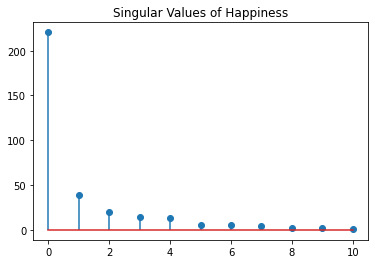

In [13]:
plt.stem(model.singular_)
plt.title('Singular Values of Happiness')

## 2.0 - Pivoting to More Advanced Modeling

In [14]:
def comparemodels():
    plt.bar(modelscoredict.keys(), modelscoredict.values())
    plt.title('R^2 Values for All Models So Far');
    
def addmodel(name, model):
    modelscoredict[name] = model.score(X, y)

In [15]:
ridgemodel = lm.Ridge()

In [16]:
ridgemodel.fit(X, y)

Ridge()

In [17]:
ridgemodel.coef_

array([-0.00456352,  1.00895157, -0.08824454, -0.01412213,  0.4709375 ,
       -0.23919275, -0.10338372,  0.15165508,  0.84525308, -0.03154876,
       -0.11449173])

In [18]:
modelscoredict = {}
addmodel('Least Squares', model)
model.score(X,y)

0.5550622435300578

In [19]:
addmodel('Ridge', ridgemodel)
ridgemodel.score(X, y)

0.5306769104651177

Weather (rain = 0 to sun = 1)  had the largest change, from  2.433974208343119  to  0.8452530844222512


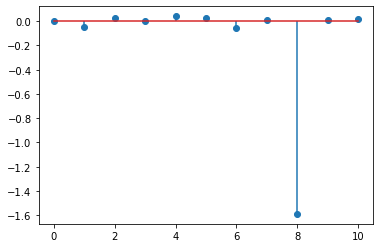

In [20]:
plt.stem(ridgemodel.coef_ - model.coef_)
print(cols[8] , ' had the largest change, from ', model.coef_[8], ' to ', ridgemodel.coef_[8])

Text(0.5, 1.0, 'Least Squares Coefficients vs. Ridge Coefficients')

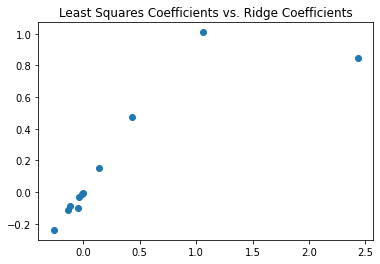

In [21]:
plt.scatter(model.coef_, ridgemodel.coef_)
plt.title('Least Squares Coefficients vs. Ridge Coefficients')

In [22]:
for name, coef in zip(cols, ridgemodel.coef_):
    print(name, ':', coef)
print('with intercept =', ridgemodel.intercept_)

People Seen : -0.004563521884369156
Meals Eaten : 1.0089515703859533
Smoke : -0.08824453877259346
Drink : -0.014122130356133512
Catherine : 0.4709374984097137
Hours of sleep : -0.23919274591961065
Hours of Classes : -0.10338371867491869
Hours of music : 0.15165508240955397
Weather (rain = 0 to sun = 1) : 0.8452530844222512
Average (Day) Temperature : -0.03154876337662614
Hours of project/internship : -0.11449172994192139
with intercept = 9.124976757503411


In [23]:
elasticmodel = lm.ElasticNet()

In [24]:
elasticmodel.fit(X, y)

ElasticNet()

In [25]:
elasticmodel.coef_

array([-0.00440649,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.0358706 ,
       -0.05004338])

In [26]:
addmodel('Elastic', elasticmodel)
elasticmodel.score(X, y)

0.09447648316593449

In [27]:
testarr = [1,2,3,4,5,6]
testarr.index(max(testarr))

5

Weather (rain = 0 to sun = 1)  had the largest change, from  2.433974208343119  to  0.0


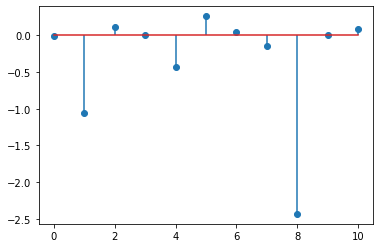

In [28]:
changes = elasticmodel.coef_ - model.coef_
plt.stem(changes);
changesmag = (abs(changes)).tolist()
biggestdiff = changesmag.index(max(changesmag))
print(cols[biggestdiff] , ' had the largest change, from ', model.coef_.tolist()[biggestdiff], ' to ', elasticmodel.coef_.tolist()[biggestdiff])

Meals Eaten  had the largest change, from  1.0089515703859533  to  0.0


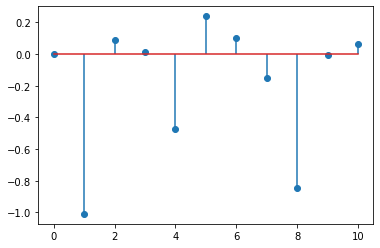

In [29]:
changes = elasticmodel.coef_ - ridgemodel.coef_
plt.stem(changes);
changesmag = (abs(changes)).tolist()
biggestdiff = changesmag.index(max(changesmag))
print(cols[biggestdiff] , ' had the largest change, from ', ridgemodel.coef_.tolist()[biggestdiff], ' to ', elasticmodel.coef_.tolist()[biggestdiff])

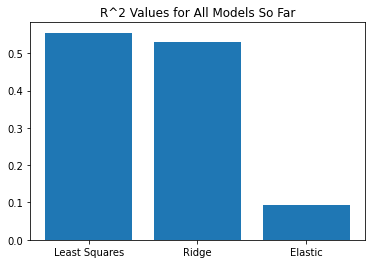

In [30]:
comparemodels()

In [31]:
for name, coef in zip(cols, elasticmodel.coef_):
    print(name, ':', coef)
print('with intercept =', ridgemodel.intercept_)

People Seen : -0.004406492089278952
Meals Eaten : 0.0
Smoke : 0.0
Drink : -0.0
Catherine : 0.0
Hours of sleep : -0.0
Hours of Classes : -0.0
Hours of music : 0.0
Weather (rain = 0 to sun = 1) : 0.0
Average (Day) Temperature : -0.03587060096702997
Hours of project/internship : -0.05004337897087917
with intercept = 9.124976757503411


## 3.0 - Testing the Models

In [32]:
# Extreme test cases and Regular test cases to Explore general Viability
myworstday = np.array([0, 1, 0, 0, 0, 5, 10, 0, 0, 30, 10]).reshape(1, -1)
mybestday = np.array([100, 3, 5, 0, 1, 9, 5, 2, 1, 70, 0]).reshape(1, -1)
anaverageday = np.array([40, 3, 2, 1, 1, 8, 8, 1, 0.8, 75, 0]).reshape(1, -1)
highschoolavg = np.array([50, 3, 0, 0, 0, 8, 6, 2, 0.7, 90, 0]).reshape(1, -1)
tomorrowprob = np.array([20, 3, 0, 2, 1, 9, 2, 1, 0.8, 70, 7]).reshape(1, -1)
tests = [myworstday, mybestday, anaverageday, highschoolavg, tomorrowprob]
target = np.array([5, 10, 8, 8, 9])

In [33]:
model.predict(myworstday)[0]

5.245626911670501

In [34]:
target[tests.index(myworstday)]

5

In [35]:
modelperformance = []
rawmodelperformance = []
for arch in [model, ridgemodel, elasticmodel]:
    temp = 0
    templist = []
    targetindex = 0
    for arr in tests:
        score = arch.predict(arr)[0] - target[targetindex]
        temp += score
        templist.append(score)
        targetindex += 1
    modelperformance.append(temp)
    rawmodelperformance.append(templist)

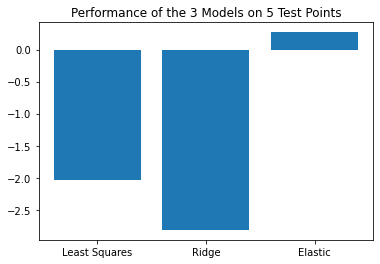

In [36]:
plt.bar(modelscoredict.keys(), modelperformance)
plt.title('Performance of the 3 Models on 5 Test Points');

In [37]:
# Interestingly enough, Elastic actually performs best in the long run! Although its individual predictions are worse


In [38]:
rawmodelperformance[0][0], rawmodelperformance[1][0], rawmodelperformance[2][0]

(0.24562691167050144, 0.812747210824126, 4.23585889435388)

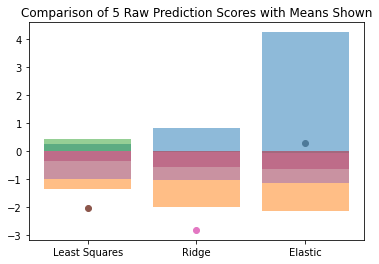

In [39]:
for i in np.arange(5):
    plt.bar(modelscoredict.keys(), [rawmodelperformance[0][i], 
                                    rawmodelperformance[1][i],
                                    rawmodelperformance[2][i]], alpha = 0.5)
plt.scatter(0, modelperformance[0])
plt.scatter(1, modelperformance[1])
plt.scatter(2, modelperformance[2])
plt.title('Comparison of 5 Raw Prediction Scores with Means Shown');

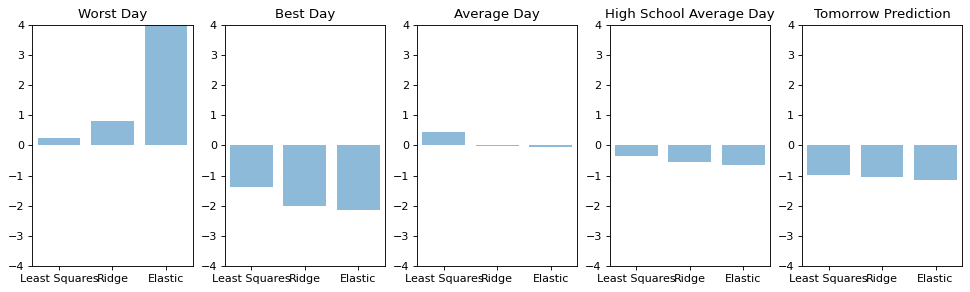

In [40]:
#Now separately
plt.figure(figsize=(15, 4), dpi=80)
testnames = ['Worst Day', 'Best Day', 'Average Day', 'High School Average Day', 'Tomorrow Prediction']
for i in np.arange(5):
    plt.subplot(1, 5, i+1)
    plt.bar(modelscoredict.keys(), [rawmodelperformance[0][i], 
                                    rawmodelperformance[1][i],
                                    rawmodelperformance[2][i]], alpha = 0.5)
    plt.title(testnames[i])
    plt.axis((-0.5, 2.5, -4, 4))